# PHP - Pulsating Heat Pipe
Data collection and preparation for data analysis and machine learning 

In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import missingno as msno
sns.set()
import glob
from ipynb.fs.full.mdf import DataChop, DataArrange

## Data loading

### MDF Functions 
[more details: help(function_name)]
1. DataETL
2. DataChop

In [195]:
def DataETL(datapath):
    """
    DataETL loads experimental data from all experimental data files (xlsx).
    Filters data and keeps only important columns.
    Combine selected data and save it to csv file.

    useage: DataETL('datapath')
    """
    data_filenames_list = glob.glob((datapath + 'php*.csv'))
    df_frames = []
    for i in range(0, len(data_filenames_list)) :
        df_raw = pd.read_csv((data_filenames_list[i]), sep=',')
        selected_columns = ['Time (Min)', 'Tc - AVG 1&2 (oC)', 'Te - AVG 1,2,3 (oC)', 'Pressure (mm of Hg).1', 'Te - Tc (oC)', 'Q (W)',
            'Resistance (oC/W)']
        df_selected_columns = df_raw[selected_columns]
        df_frames.append(df_selected_columns)
        df = pd.concat(df_frames, axis=0, ignore_index=True)
        df_out = df.to_csv(datapath + "combined_data.csv")
    return df

## EDA

In [212]:
# loading and cleaning data
df = DataETL('data/data_php_al2o3/')

In [209]:
df.describe()

,Time (Min),Tc - AVG 1&2 (oC),"Te - AVG 1,2,3 (oC)",Pressure (mm of Hg).1,Te - Tc (oC),Q (W),Resistance (oC/W)
count,408.000000,408.000000,408.000000,408.000000,408.000000,408.0,408.000000
mean,26.604167,56.470588,71.089730,539.747549,14.619142,80.0,0.182741
std,16.628609,14.000002,15.649645,153.881580,5.086367,0.0,0.063581
min,0.000000,27.250000,27.330000,260.000000,0.080000,80.0,0.001042
25%,12.500000,45.750000,64.080000,403.750000,10.920000,80.0,0.136458
50%,25.250000,61.000000,77.670000,572.500000,15.210000,80.0,0.190104
75%,40.000000,68.062500,82.670000,660.000000,18.000000,80.0,0.225000
max,61.000000,75.000000,90.000000,797.000000,27.500000,80.0,0.343750


In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 0 to 445
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Time (Min)             446 non-null    float64
 1   Tc - AVG 1&2 (oC)      445 non-null    float64
 2   Te - AVG 1,2,3 (oC)    445 non-null    float64
 3   Pressure (mm of Hg).1  445 non-null    float64
 4   Te - Tc (oC)           445 non-null    float64
 5   Q (W)                  445 non-null    float64
 6   Resistance (oC/W)      445 non-null    float64
dtypes: float64(7)
memory usage: 24.5 KB


<Axes: title={'center': 'Tc & Te'}, xlabel='Data', ylabel='Temperature[C]'>

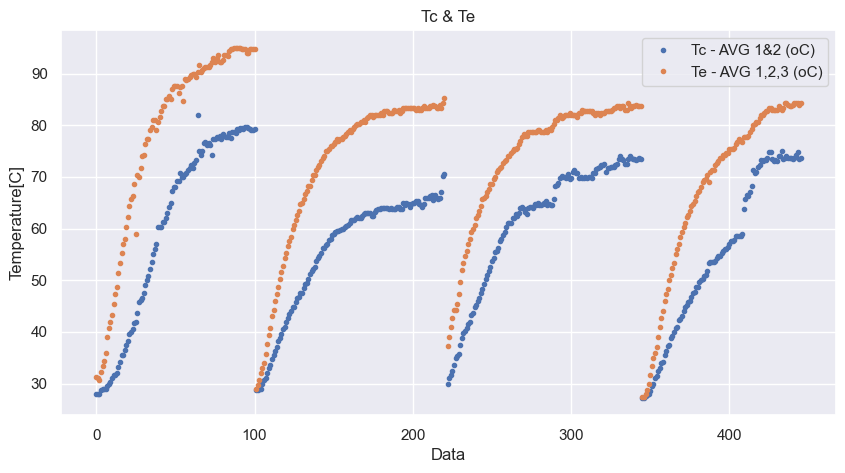

In [199]:
df[['Tc - AVG 1&2 (oC)', 'Te - AVG 1,2,3 (oC)']].plot(style='.',
                                                      figsize=(10,5),
                                                      title = 'Tc & Te',
                                                      xlabel='Data',
                                                      ylabel='Temperature[C]')

<Axes: title={'center': 'Thermal Performance'}, xlabel='Data', ylabel='Thermal Resistance [C/W]'>

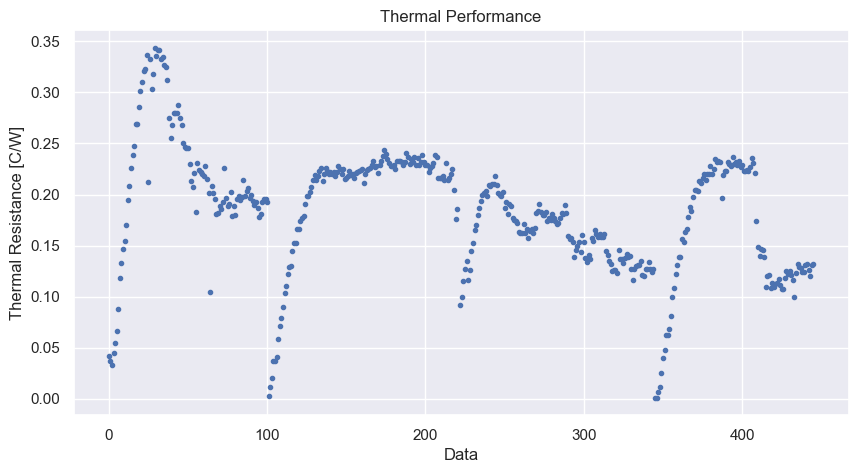

In [200]:
df['Resistance (oC/W)'].plot(style='.',
                             figsize=(10,5),
                             title =  'Thermal Performance',
                             xlabel='Data',
                             ylabel='Thermal Resistance [C/W]')

<Axes: title={'center': 'Pressure'}, xlabel='Data', ylabel='Pressure [mmHg]'>

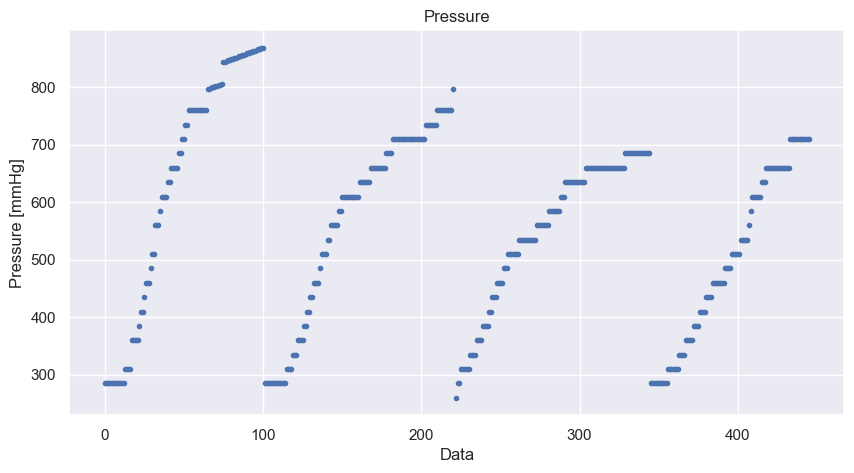

In [201]:
df['Pressure (mm of Hg).1'].plot(style='.',
                                 figsize=(10,5),
                                 title='Pressure',
                                 xlabel='Data',
                                 ylabel='Pressure [mmHg]')

<Axes: title={'center': 'Temperature Difference'}, xlabel='Data', ylabel='Temperature Difference[C]'>

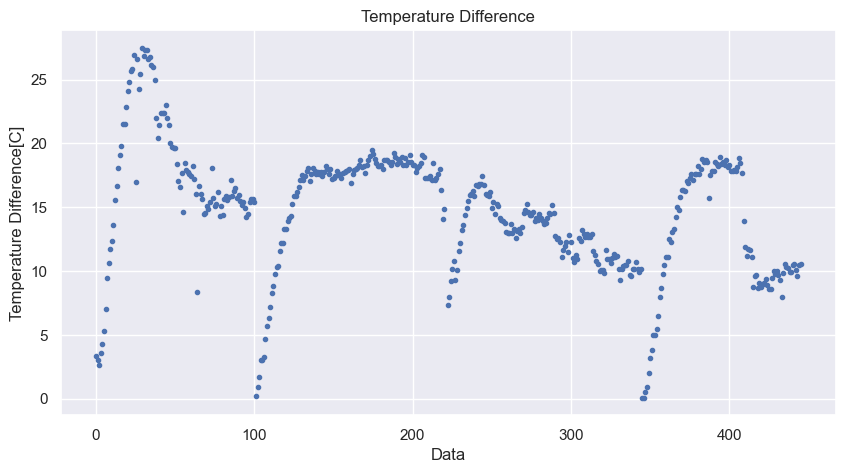

In [202]:
df['Te - Tc (oC)'].plot(style='.',
                        figsize=(10,5),
                        title=('Temperature Difference'),
                        xlabel='Data',
                        ylabel='Temperature Difference[C]')